# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations

1. Cloudiness had no relation with latitude. The points were very desperesed regardless of the latitudes
2. As the latitude got away from the equator (latitude of 0 ) the temperature went down.
3. Humidity also had no relation with laitude. 


In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import apikey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [31]:
#saving config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL

query_url = f"{url}appid={apikey}&units={units}&q="



## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:

# Creating empty lists for the data we need

city_data = []
max_temp = []
humid = []
cloud = []
wind = []
lat = []
lng = []
country = []
date = []

count = 0
set = 1
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if count > 48:
            count = 1
            set += 1
            city_data.append(city)
        else:
            count += 1
            city_data.append(city)
        print(f"Processing Record {count} of Set {set} | {city}")
   
    except Exception:
        print("City not found. Skipping...")

        
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")    

Processing Record 1 of Set 1 | eenhana
City not found. Skipping...
Processing Record 2 of Set 1 | coahuayana
City not found. Skipping...
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | cutervo
Processing Record 6 of Set 1 | port hawkesbury
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | zhangjiakou
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | plettenberg bay
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | grand forks
Processing Record 13 of Set 1 | nurlat
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | biak
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | zhigansk
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | skjervoy
Processing Record 22 of Set 1 

Processing Record 40 of Set 4 | roma
Processing Record 41 of Set 4 | kokino
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | xuddur
Processing Record 44 of Set 4 | pozo colorado
Processing Record 45 of Set 4 | sainte-luce-sur-loire
Processing Record 46 of Set 4 | baykit
Processing Record 47 of Set 4 | zyryanka
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | nakambala
Processing Record 1 of Set 5 | hamilton
Processing Record 2 of Set 5 | cabra
City not found. Skipping...
Processing Record 3 of Set 5 | batticaloa
Processing Record 4 of Set 5 | saint george
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | maxixe
Processing Record 7 of Set 5 | pemba
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | amazar
Processing Record 10 of Set 5 | kapit
Processing Record 11 of Set 5 | anadyr
Processing Record 12 of Set 5 | goure
Processing Record 13 of Set 5 | quang ngai
City not found. Skipp

Processing Record 35 of Set 8 | sao gabriel da cachoeira
Processing Record 36 of Set 8 | ostrovnoy
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | havre-saint-pierre
Processing Record 39 of Set 8 | srednekolymsk
Processing Record 40 of Set 8 | plouzane
Processing Record 41 of Set 8 | waipawa
Processing Record 42 of Set 8 | broken hill
Processing Record 43 of Set 8 | sampit
Processing Record 44 of Set 8 | luba
Processing Record 45 of Set 8 | palu
Processing Record 46 of Set 8 | cao bang
Processing Record 47 of Set 8 | airai
Processing Record 48 of Set 8 | bagotville
City not found. Skipping...
Processing Record 49 of Set 8 | sivas
Processing Record 1 of Set 9 | brae
Processing Record 2 of Set 9 | zhucheng
Processing Record 3 of Set 9 | salinas
Processing Record 4 of Set 9 | kula
Processing Record 5 of Set 9 | saint-augustin
Processing Record 6 of Set 9 | rocha
Processing Record 7 of Set 9 | olga
Processing Record 8 of Set 9 | rantauprapat
Processing Record 9

Processing Record 27 of Set 12 | nueva gerona
Processing Record 28 of Set 12 | ariquemes
City not found. Skipping...
Processing Record 29 of Set 12 | tutoia
Processing Record 30 of Set 12 | elk city
Processing Record 31 of Set 12 | montpellier
Processing Record 32 of Set 12 | gillette
Processing Record 33 of Set 12 | kuminskiy
Processing Record 34 of Set 12 | eyl
Processing Record 35 of Set 12 | daniel flores
Processing Record 36 of Set 12 | kaz
Processing Record 37 of Set 12 | rafaela
Processing Record 38 of Set 12 | codrington
Processing Record 39 of Set 12 | manono
Processing Record 40 of Set 12 | werda
Processing Record 41 of Set 12 | marzuq
Processing Record 42 of Set 12 | sinegorskiy
Processing Record 43 of Set 12 | taicheng
Processing Record 44 of Set 12 | aykhal
City not found. Skipping...
Processing Record 45 of Set 12 | vila
Processing Record 46 of Set 12 | ancud
Processing Record 47 of Set 12 | capitan bado
-----------------------
Data Retrieval Complete
--------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [142]:
weather_dict = {
    "City": city_data,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidty": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data.count()


City          586
Lat           586
Lng           586
Max Temp      586
Humidty       586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [143]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidty,Cloudiness,Wind Speed,Country,Date
0,eenhana,-17.47,16.33,51.80,40,0,1.12,NA,1594684006
1,coahuayana,18.73,-103.68,82.40,69,40,11.41,MX,1594683784
2,tuktoyaktuk,69.45,-133.04,62.60,63,40,6.93,CA,1594684007
3,port elizabeth,-33.92,25.57,53.51,51,50,20.33,ZA,1594684007
4,cutervo,-6.38,-78.82,50.74,100,51,2.80,PE,1594684007


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [144]:
#General Stats for the DataFrame
weather_data.describe()

,Lat,Lng,Max Temp,Humidty,Cloudiness,Wind Speed,Date
count,586.0000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.5393,18.784164,68.450939,72.000000,48.883959,7.801160,1.594684e+09
std,33.6853,92.120816,13.941493,19.329443,37.353340,5.304431,1.257309e+02
min,-54.8000,-179.170000,33.800000,9.000000,0.000000,0.220000,1.594684e+09
25%,-7.7475,-64.980000,58.622500,61.250000,10.000000,3.360000,1.594684e+09
50%,26.0550,23.325000,70.330000,76.000000,42.500000,6.910000,1.594684e+09
75%,48.7700,105.885000,78.800000,87.000000,88.000000,11.082500,1.594684e+09
max,78.2200,179.320000,109.400000,100.000000,100.000000,27.650000,1.594684e+09


In [159]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
weather_data_clean = weather_data.copy()
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Removing the cities where the humidty > 100 %

for index, row in weather_data_clean.iterrows():
    if row['Humidty'] > 100:
        weather_data_clean.drop(index, inplace = True)
        


In [160]:
# Extract relevant fields from the data frame

weather_data_clean.to_csv("output_data/clean_city_data.csv")
# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

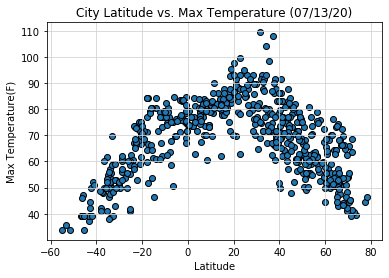

In [147]:
plt.scatter(weather_data_clean["Lat"],weather_data_clean["Max Temp"], edgecolors = "black")
plt.title("City Latitude vs. Max Temperature (07/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

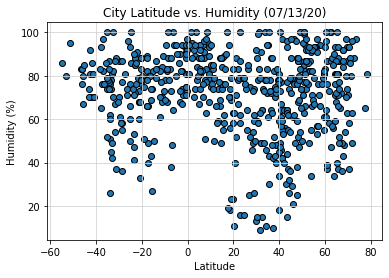

In [148]:
plt.scatter(weather_data_clean["Lat"],weather_data_clean["Humidty"], edgecolors = "black")
plt.title("City Latitude vs. Humidity (07/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

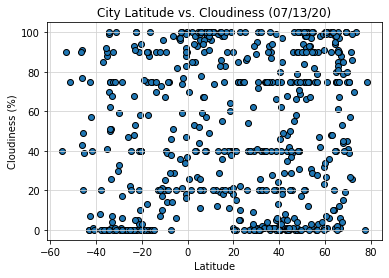

In [149]:
plt.scatter(weather_data_clean["Lat"],weather_data_clean["Cloudiness"], edgecolors = "black")
plt.title("City Latitude vs. Cloudiness (07/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

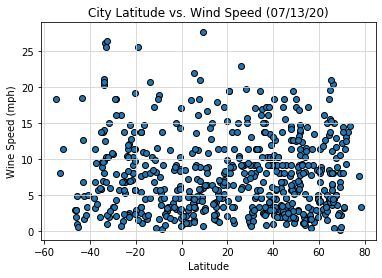

In [150]:
plt.scatter(weather_data_clean["Lat"],weather_data_clean["Wind Speed"], edgecolors = "black")
plt.title("City Latitude vs. Wind Speed (07/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Wine Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [208]:
# Create Northern and Southern Hemisphere DataFrames

weather_data_north = weather_data_clean.copy()
weather_data_south = weather_data_clean.copy()

In [209]:
# Northern Hemisphere
for index, row in weather_data_north.iterrows():
    if row['Lat'] < 0 :
        weather_data_north.drop(index, inplace = True)

weather_data_north
        

,City,Lat,Lng,Max Temp,Humidty,Cloudiness,Wind Speed,Country,Date
1,coahuayana,18.73,-103.68,82.40,69,40,11.41,MX,1594683784
2,tuktoyaktuk,69.45,-133.04,62.60,63,40,6.93,CA,1594684007
5,port hawkesbury,45.62,-61.35,78.01,78,75,4.70,CA,1594684007
7,zhangjiakou,40.81,114.88,70.23,64,62,2.91,CN,1594684008
10,cabo san lucas,22.89,-109.91,93.20,58,5,11.41,MX,1594683812
...,...,...,...,...,...,...,...,...,...
579,marzuq,14.40,46.47,81.70,49,86,5.86,YE,1594684219
580,sinegorskiy,48.01,40.84,69.84,88,100,6.51,RU,1594684220
581,taicheng,38.73,113.23,67.60,74,99,2.91,CN,1594684220
582,aykhal,66.00,111.50,68.00,49,12,4.47,RU,1594684220


In [210]:


for index, row in weather_data_south.iterrows():
    if row['Lat'] >= 0 :
        weather_data_south.drop(index, inplace = True)
        
weather_data_south        


,City,Lat,Lng,Max Temp,Humidty,Cloudiness,Wind Speed,Country,Date
0,eenhana,-17.47,16.33,51.80,40,0,1.12,NA,1594684006
3,port elizabeth,-33.92,25.57,53.51,51,50,20.33,ZA,1594684007
4,cutervo,-6.38,-78.82,50.74,100,51,2.80,PE,1594684007
6,busselton,-33.65,115.33,50.00,78,51,12.53,AU,1594684007
8,port alfred,-33.59,26.89,55.72,45,26,26.15,ZA,1594684008
...,...,...,...,...,...,...,...,...,...
576,codrington,-38.27,141.97,48.79,83,8,4.65,AU,1594684219
577,manono,-7.30,27.42,67.84,38,38,0.89,CD,1594684219
578,werda,-25.27,23.28,41.76,66,0,7.85,BW,1594684219
584,ancud,-41.87,-73.82,39.20,86,40,2.24,CL,1594684220


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.448126402635904


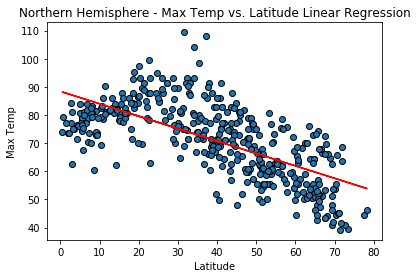

In [219]:
slope, intercept, r_value, p_value, std_err = st.linregress(weather_data_north["Lat"],weather_data_north["Max Temp"])

print(f"The r-squared is: {r_value**2}")
y = weather_data_north["Lat"]*slope + intercept
plt.scatter(weather_data_north["Lat"],weather_data_north["Max Temp"], edgecolors = "black")
plt.plot(weather_data_north["Lat"], y, color = "red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("output_data/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6794071327938865


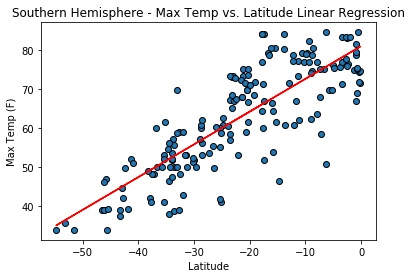

In [220]:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(weather_data_south["Lat"],weather_data_south["Max Temp"])

print(f"The r-squared is: {r_value2**2}")
y = weather_data_south["Lat"]*slope2 + intercept2
plt.scatter(weather_data_south["Lat"],weather_data_south["Max Temp"], edgecolors = "black")
plt.plot(weather_data_south["Lat"], y, color = "red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008096745315255922


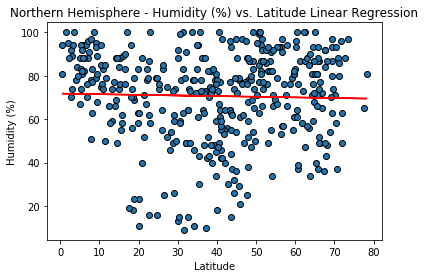

In [221]:
slope3, intercept3, r_value3, p_value3, std_err3 = st.linregress(weather_data_north["Lat"],weather_data_north["Humidty"])

print(f"The r-squared is: {r_value3**2}")
y = weather_data_north["Lat"]*slope3 + intercept3
plt.scatter(weather_data_north["Lat"],weather_data_north["Humidty"], edgecolors = "black")
plt.plot(weather_data_north["Lat"], y, color = "red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010121818324650906


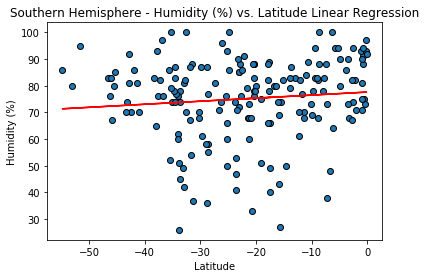

In [222]:
slope4, intercept4, r_value4, p_value4, std_err4 = st.linregress(weather_data_south["Lat"],weather_data_south["Humidty"])

print(f"The r-squared is: {r_value4**2}")
y = weather_data_south["Lat"]*slope4 + intercept4
plt.scatter(weather_data_south["Lat"],weather_data_south["Humidty"], edgecolors = "black")
plt.plot(weather_data_south["Lat"], y, color = "red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0001585410148228788


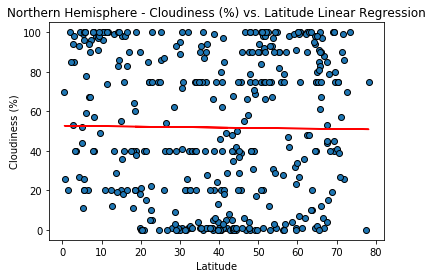

In [223]:
slope5, intercept5, r_value5, p_value5, std_err5 = st.linregress(weather_data_north["Lat"],weather_data_north["Cloudiness"])

print(f"The r-squared is: {r_value5**2}")
y = weather_data_north["Lat"]*slope5 + intercept5
plt.scatter(weather_data_north["Lat"],weather_data_north["Cloudiness"], edgecolors = "black")
plt.plot(weather_data_north["Lat"], y, color = "red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.027916271239822085


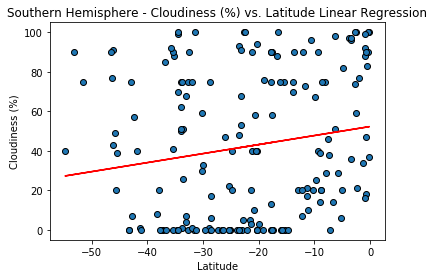

In [224]:
slope6, intercept6, r_value6, p_value6, std_err6 = st.linregress(weather_data_south["Lat"],weather_data_south["Cloudiness"])

print(f"The r-squared is: {r_value6**2}")
y = weather_data_south["Lat"]*slope6 + intercept6
plt.scatter(weather_data_south["Lat"],weather_data_south["Cloudiness"], edgecolors = "black")
plt.plot(weather_data_south["Lat"], y, color = "red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00040350260023536475


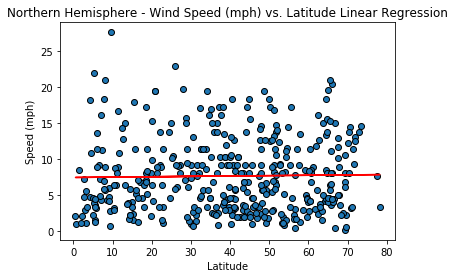

In [225]:
slope7, intercept7, r_value7, p_value7, std_err7 = st.linregress(weather_data_north["Lat"],weather_data_north["Wind Speed"])

print(f"The r-squared is: {r_value7**2}")
y = weather_data_north["Lat"]*slope7 + intercept7
plt.scatter(weather_data_north["Lat"],weather_data_north["Wind Speed"], edgecolors = "black")
plt.plot(weather_data_north["Lat"], y, color = "red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.savefig("output_data/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012712809562420048


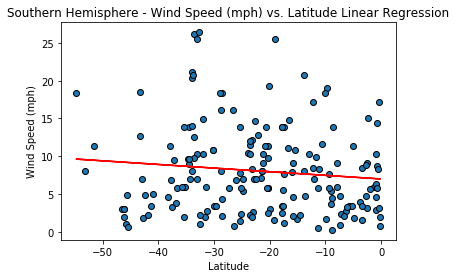

In [226]:
slope8, intercept8, r_value8, p_value8, std_err8 = st.linregress(weather_data_south["Lat"],weather_data_south["Wind Speed"])

print(f"The r-squared is: {r_value8**2}")
y = weather_data_south["Lat"]*slope8 + intercept8
plt.scatter(weather_data_south["Lat"],weather_data_south["Wind Speed"], edgecolors = "black")
plt.plot(weather_data_south["Lat"], y, color = "red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/fig12.png")
plt.show()